In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import healpy as hp
import astropy.units as u
from astropy.coordinates import SkyCoord
import glob
import os
import sys

sys.path.insert(0, '/home/aew492/lss-dipoles/code')
import tools
import generate_mocks as gm

### load Cell results

#### CatWISE

In [23]:
Lambda = 1e-2
result_dir = os.path.join(f'/scratch/aew492/lss-dipoles_results/results')

# which catalog?
catname = 'catwise'
selfunc_mode = 'catwise_zodi'
set_name = 'excess_catwise'
n_trials_per_case = 10

excesss = [1e-7, 1e-6, 1e-4] # excess power
dipamp = 0.0074
base_rate = 72.42

#### data

In [9]:
# Load data
fn_comps_data = os.path.join(result_dir, 'results_data',
                    f"Cells_Lambda-{Lambda:.1e}_{catname}_case-{selfunc_mode}.npy")
result_dict = np.load(fn_comps_data, allow_pickle=True).item()
Cells_data = result_dict['Cells']
ells_data = result_dict['ells']

#### mocks

In [14]:
Cells_results = []
for i, excess in enumerate(excesss):
    Cellss = []
    for j in range(n_trials_per_case):
        res = np.load(os.path.join(result_dir, 'results_mocks', set_name, 
                        f'Cells_Lambda-{Lambda:.1e}_mock_case-excess-{excess:.0e}-{selfunc_mode}-{dipamp:.4f}-{base_rate:.3f}_trial{j:03d}.npy'),
                     allow_pickle=True).item()
        Cellss.append(res['Cells'])
    res_thisexcess = {
        'ells' : res['ells'],
        'Cells' : np.nanmean(np.array(Cellss), axis=0),
        'excess' : excess,
    }
    Cells_results.append(res_thisexcess)

Text(0.5, 1.0, 'excess_catwise: input dipole amp. = 0.0074, selfunc = catwise_zodi, $\\Lambda=$1.0e-02')

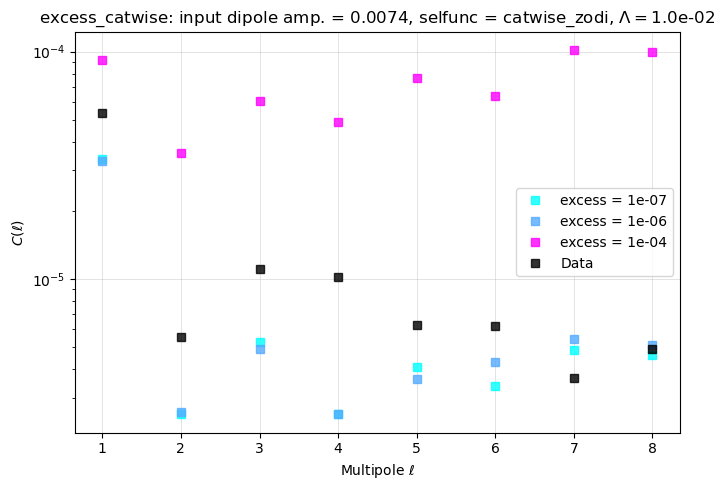

In [15]:
fig, ax = plt.subplots(figsize=(7,5), tight_layout=True)
norm = mpl.colors.LogNorm(vmin=min(excesss), vmax=max(excesss))
smap = mpl.cm.ScalarMappable(norm=norm, cmap='cool')

for i, res in enumerate(Cells_results):
    ax.plot(res['ells'][1:], res['Cells'][1:], ls='None', marker='s', c=smap.to_rgba(res['excess']),
            alpha=0.8, label=f"excess = {res['excess']:.0e}")

# data
ax.plot(ells_data[1:], Cells_data[1:], ls='None', marker='s', c='k', alpha=0.8, label=f"Data")

ax.grid(alpha=0.5, lw=0.5)
ax.set_yscale('log')
ax.set_xlabel(r'Multipole $\ell$')
ax.set_ylabel(r'$C(\ell)$')
ax.legend()
ax.set_title(set_name + f": input dipole amp. = {dipamp:.4f}, selfunc = {selfunc_mode}, "r"$\Lambda=$"f"{Lambda:.1e}")

#### Quaia

In [29]:
Lambda = 1e-2
result_dir = os.path.join(f'/scratch/aew492/lss-dipoles_results/results')

# which catalog?
catname = 'quaia_G20.0'
selfunc_mode = 'quaia_G20.0_orig'
set_name = 'excess_quaia'
n_trials_per_case = 10

excesss = [1e-6, 1e-5, 1e-4] # excess power
dipamp = 0.0052
base_rate = 33.64

In [30]:
# Load data
fn_comps_data = os.path.join(result_dir, 'results_data',
                    f"Cells_Lambda-{Lambda:.1e}_{catname}_case-{selfunc_mode}.npy")
result_dict = np.load(fn_comps_data, allow_pickle=True).item()
Cells_data = result_dict['Cells']
ells_data = result_dict['ells']

In [31]:
# mock results
Cells_results = []
for i, excess in enumerate(excesss):
    Cellss = []
    for j in range(n_trials_per_case):
        res = np.load(os.path.join(result_dir, 'results_mocks', set_name, 
                        f'Cells_Lambda-{Lambda:.1e}_mock_case-excess-{excess:.0e}-{selfunc_mode}-{dipamp:.4f}-{base_rate:.3f}_trial{j:03d}.npy'),
                     allow_pickle=True).item()
        Cellss.append(res['Cells'])
    res_thisexcess = {
        'ells' : res['ells'],
        'Cells' : np.nanmean(np.array(Cellss), axis=0),
        'excess' : excess,
    }
    Cells_results.append(res_thisexcess)

Text(0.5, 1.0, 'excess_quaia: input dipole amp. = 0.0052, selfunc = quaia_G20.0_orig, $\\Lambda=$1.0e-02')

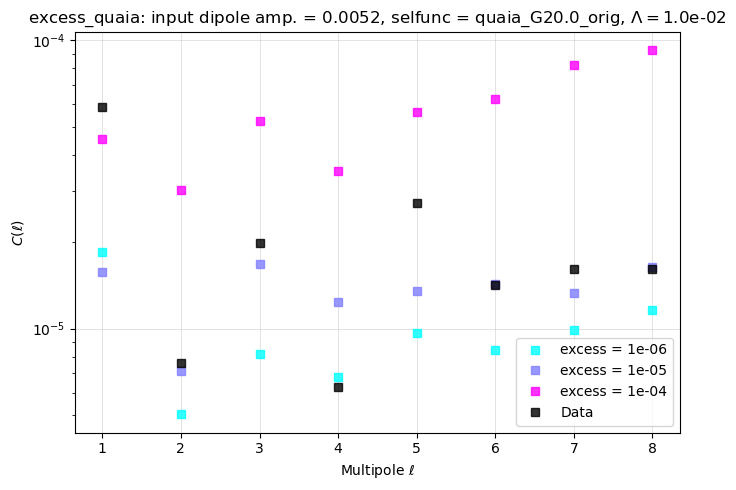

In [32]:
fig, ax = plt.subplots(figsize=(7,5), tight_layout=True)
norm = mpl.colors.LogNorm(vmin=min(excesss), vmax=max(excesss))
smap = mpl.cm.ScalarMappable(norm=norm, cmap='cool')

for i, res in enumerate(Cells_results):
    ax.plot(res['ells'][1:], res['Cells'][1:], ls='None', marker='s', c=smap.to_rgba(res['excess']),
            alpha=0.8, label=f"excess = {res['excess']:.0e}")

# data
ax.plot(ells_data[1:], Cells_data[1:], ls='None', marker='s', c='k', alpha=0.8, label=f"Data")

ax.grid(alpha=0.5, lw=0.5)
ax.set_yscale('log')
ax.set_xlabel(r'Multipole $\ell$')
ax.set_ylabel(r'$C(\ell)$')
ax.legend()
ax.set_title(set_name + f": input dipole amp. = {dipamp:.4f}, selfunc = {selfunc_mode}, "r"$\Lambda=$"f"{Lambda:.1e}")